UM MSBA - BGEN632

# Week 10 Independent Lab Walkthrough: Decision Trees

Notebook author: Olivia B. Newton, Ph.D.  

Notebook description: This notebook provides a walkthrough of the Week 11 independent lab which tasks BGEN632 students with assessing data with decision trees

You are under strict rules not to share this notebook or the content within it with anyone else, especially those who are not enrolled in this course. I trust you with this responsibility.

## Context 

Recall that you belong to a team assigned to assess the condition of the healthcare system in California. You currently work in the Information Systems department for a consulting firm working with the state government agency that oversees the healthcare system in California. 

## Classification Trees and Regression Trees

In the previous weeks, your supervisor tasked you with subsetting and describing hospital data. Now, they would like you assess the data and build initial models. Specifically, they would like you to build decision trees. 

This assignment requires you to build *classification* trees and *regression* trees.

Decide on the predictor variables you use for these analyses. Have at least one categorical predictor and one numerical predictor. In total, have at least three predictors per model. Keep in mind that some of the variables are highly correlated (e.g., Operating Revenue and Net Patient Revenue) and should not be modeled together.

* Using `operating income` as a target variable, create a tree
* Using `operating revenue` as a target variable, create a tree 
* Using `TypeControl` as a target variable, create a tree
* Using `DonorType` as a target variable, create a tree

Now that you have built several different trees, you need to assess each one.

* Interpret your findings for these trees. Explain why you think the splits you received make sense.
* Which of these trees would you choose as your best model? Justify your position.
  * Note that you do not have to use an objective assessment, such as scoring predicted values, due to the small sample size.
 
**Save your notebook with code output and responses to the questions outlined above. Responses should be provided in Markdown cells. Then submit your notebook for grading.**

---

## Notebook Setup


In [3]:
# load modules
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

# for displaying the tree
import graphviz
from six import StringIO
from IPython.display import Image, display
import pydotplus

In [9]:
# set working directory
os.chdir('/Users/markl1/Documents/Studies/Grad_School-MBA/Spring_2025/Python/week10labs/data')
os.getcwd()

'/Users/markl1/Documents/Studies/Grad_School-MBA/Spring_2025/Python/week10labs/data'

In [10]:
# load data
hosp_df = pd.read_table("calihospital.txt", sep = '\t')

hosp_df

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,1.361567e+05,3.344754e+07,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,1.970943e+05,3.725418e+07,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,1.391704e+05,2.338557e+07,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,1.167978e+05,1.368450e+07,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,32930,Scripps Mercy Hospital,92103,www.scrippshealth.org,Non Profit,Teaching,Alumni,2814.0,1.321032e+06,3.791029e+08,...,530,411280,Manin,Emily,F,1,Regional Representative,46978,4,1/1/2011
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,www.memorialcare.org,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,...,462,310431,Dong,HongWei,F,4,Safety Inspection Member,23987,2,1/1/2012
58,22460,Stanford Hospital & Clinics,94305,stanfordhospital.org,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,...,445,380668,Smith,Mary,F,4,Safety Inspection Member,23987,2,1/1/2012
59,33192,California Pacific Medical Center - Pacific Ca...,94115,www.cpmc.org,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,...,730,308150,Fourier,Craig,M,1,Regional Representative,46978,4,1/1/2011


## Determine Candidates for Predictor Variables

The assignment instructions specify the target variables to be used in the decision trees. But it is up to us to determine which variables will be included as predictors in the models. So, as a first step, we will identify candidates for the predictor variables in our decision trees. This means that we need to inspect variables for potential inclusion in the model. Here are our requirements:

* *At least* three predictor variables total
* *At least* one of three should be categorical
* *At least* one of three should be numerical

You can have more than three predictor variables; that is just the minimum. Let's check out the datatypes present in the data:

In [11]:
hosp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

Like our modeling efforts in the instructor-led lab, we are not interested in some variables, namely those that provide identifying information about the hospital (`HospitalID`, `Name`, `Zip`, and `Website`) and those that are providing information about specific personnel (every column, or variable, after `Work_ID`). That leaves us with the following variables:

|Variable Type| Item | Definition |
|:---|:---|:---|
|Categorical| TypeControl |	Indicates the primary managing entity of the hospital |
|Categorical| Teaching |	Indicates teaching status |
|Categorical| DonorType |	This field indicates the most prominent group of donors |
|Numerical| NoFTE |	Number of full-time employees registered at the hospital |
|Numerical| NetPatRev |	Net patient revenue |
|Numerical| InOperExp |	Estimate of the inpatient operating costs |
|Numerical| OutOperExp |	Estimate of the outpatient operating costs |
|Numerical| OperRev |	Operating revenue of the hospital |
|Numerical| OperInc |	Operating income is the operating revenue less the operating expenses |
|Numerical| AvlBeds |	The number of available beds in the hospital |

As we build our models, we will also want to ensure that variables that are highly correlated and related to each other are not modeled together. Let's generate the correlation matrix for the numerical data so that we can assess it as we build our models:

In [12]:
numerical_df = (hosp_df
                .filter(['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds'])
          )

numerical_df.corr()

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
NoFTE,1.000000,0.903827,0.938051,0.880295,0.896387,-0.072314,0.881333
NetPatRev,0.903827,1.000000,0.979109,0.960232,0.998765,0.220149,0.887727
InOperExp,0.938051,0.979109,1.000000,0.935863,0.979817,0.071781,0.925521
OutOperExp,0.880295,0.960232,0.935863,1.000000,0.955239,0.056218,0.826892
OperRev,0.896387,0.998765,0.979817,0.955239,1.000000,0.234270,0.890018
OperInc,-0.072314,0.220149,0.071781,0.056218,0.234270,1.000000,0.041857
AvlBeds,0.881333,0.887727,0.925521,0.826892,0.890018,0.041857,1.000000


Okay, let's start modeling!

## Create Decision Trees

### Use `operating income` as a target variable to create a tree.

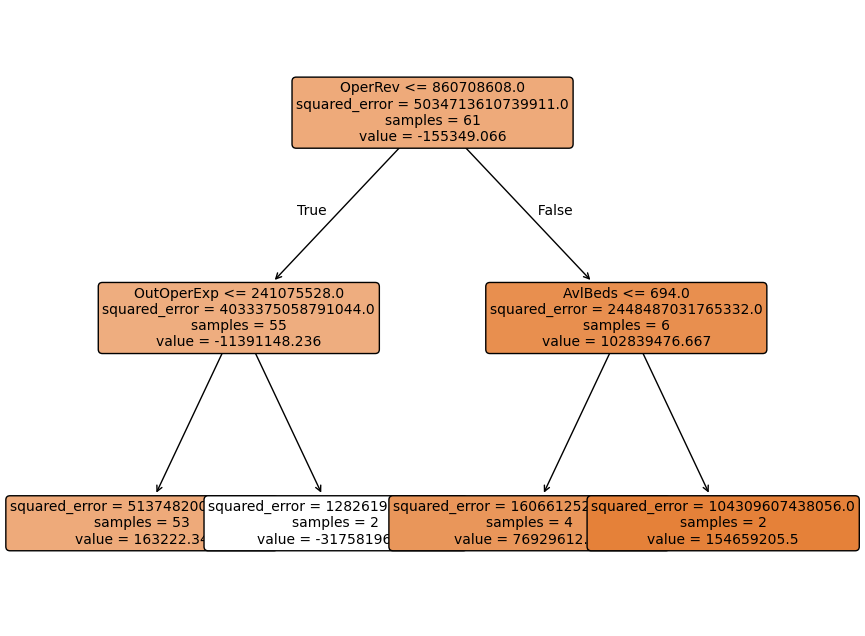

DecisionTreeRegressor(max_depth=2)

In [14]:
# subset numerical variables
hosp_sub_1 = (hosp_df
             .filter(['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'AvlBeds'])
            )

# subset categorical variables 
hosp_dummy = (hosp_df
              .filter(['TypeControl', 'Teaching', 'DonorType'])
             )

# convert categorical variable into dummy/indicator variables - we will use this DataFrame for several tree builds
dummies = pd.get_dummies(hosp_dummy, drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_1 = pd.merge(hosp_sub_1, dummies, left_index=True, right_index=True)

# create the tree - note this is a REGRESSION tree
tree_1 = tree.DecisionTreeRegressor(max_depth=2).fit(tree_data_1, hosp_df['OperInc'])


# create labels for plot
col_names1 = list(tree_data_1.columns.values)

# create plot
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_1, feature_names=col_names1, filled=True, rounded=True, fontsize=10)
plt.show()
tree_1

It is important to note that you will get slightly different results in terms of the splits returned if you run this algorithm over and over. This is because there is a *stochastic* element to these decision tree algorithms (i.e., an element of *randomness*). 

For the sake of illustrating interpretation of results, let's assume that the first split is determined by `NetPatRev` (Net Patient Revenue). It makes sense that the more revenue a hospital earns, the greater the income of that hospital. 

##### Using `operating revenue` as a target variable, create a tree.

Again, our target variable is a numerical continuous data type, so we will use a regression tree. In this model, we remove the `NetPatRev` and `OperInc` variables as predictors because they are highly correlated and related to `OperRev`. We know this based on both the correlation matrix and the results of our prior decision tree.

In [ ]:
# subset numerical variables
hosp_sub_2 = (hosp_df
            .filter(['NoFTE', 'InOperExp', 'OutOperExp', 'AvlBeds'])
           )

# merge numerical and dummy-coded categorical variables
tree_data_2 = pd.merge(hosp_sub_2, dummies, left_index=True, right_index=True)

# create tree - note this is a REGRESSION tree
tree_2 = tree.DecisionTreeRegressor(max_depth=3).fit(tree_data_2,hosp_df['OperRev'])

# get labels for plot
col_names2 = list(tree_data_2.columns.values)

# create plot
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_2, feature_names=col_names2, filled=True, rounded=True, fontsize=9)
plt.show()

Don't forget to interpret your results! 

### Using `TypeControl` as a target variable, create a tree.

Our target variable is a categorical data type, so we will use a classification tree.

In [ ]:
# subset numerical variables
hosp_sub_3 = (hosp_df
.filter(['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperInc', 'OperRev', 'AvlBeds'])
)

# subset categorical variables other than TypeControl
hosp_dummy2 = (hosp_df
               .filter(['Teaching', 'DonorType'])
              )

# convert categorical to dummy 
dummies2 = pd.get_dummies(hosp_dummy2,drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_3 = pd.merge(hosp_sub_3, dummies2, left_index=True, right_index=True)

# create tree - note this is a CLASSIFICATION tree
tree_3 = tree.DecisionTreeClassifier(max_depth=3).fit(tree_data_3, hosp_df['TypeControl'])

# create labels for plot
col_names3 = list(tree_data_3.columns.values)
classnames1 = list(hosp_df.TypeControl.unique())

# create plot
plt.figure(figsize=(12,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_3, feature_names=col_names3, class_names=classnames1, filled=True, rounded=True, fontsize=8)
plt.show()

Interpret your results...

##### Using `DonorType` as a target variable, create a tree

Again, our target variable is a categorical data type, so we will use a classification tree.

In [ ]:
# subset numerical data
hosp_sub_4 = (hosp_df
             .filter(['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperInc', 'OperRev', 'AvlBeds'])
            )

# subset categorical variables other than DonorType
hosp_dummy3 = (hosp_df
               .filter(['Teaching', 'TypeControl'])
              )

# convert categorical variable into dummy/indicator variables
dummies3 = pd.get_dummies(hosp_dummy3, drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_4 = pd.merge(hosp_sub_4, dummies3, left_index=True, right_index=True)

# create tree - note this is a CLASSIFICATION tree
tree_4 = tree.DecisionTreeClassifier(max_depth=3).fit(tree_data_4, hosp_df['DonorType'])

# create labels for plot
col_names4 = list(tree_data_4.columns.values)
classnames2 = list(hosp_df.DonorType.unique())

# create plot
plt.figure(figsize=(12,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_4, feature_names=col_names4, class_names=classnames2, filled=True, rounded=True, fontsize=8)
plt.show()

Interpret your results...

---

## Selecting a Tree

Which of these trees should we choose as the best model? We need to provide some justification for this decision. Typically, we want to rely on precise and accurate calculations (i.e., objective assessments) like scoring predicted values. However, we have a small sample size (*N* = 61) which diminishes the utility and validity of such calculations.

I would use the third tree, with `TypeControl` as a target variable. The regression trees we constructed for numerical target variables have predictor variables that would be considered highly correlated. Ultimately, the choice selected here is entirely up to the modeler. There is no "wrong" answer. So, why not choose the `DonorType` model? My rationale is similar to that provided in the results for instructor-led lab walkthrough: I would expect that who has decision-making power matters more than donor makeup for the hospitals.